# Training Models


 Training model: LOGISTIC
Accuracy: 0.8756

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      2500
           1       0.87      0.89      0.88      2500

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



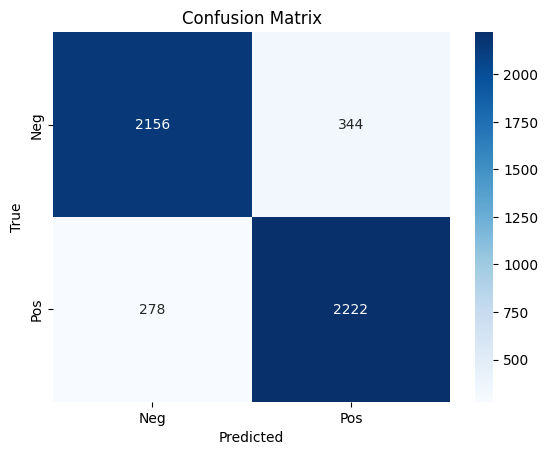


 Training model: NAIVE_BAYES
Accuracy: 0.8490

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      2500
           1       0.84      0.87      0.85      2500

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



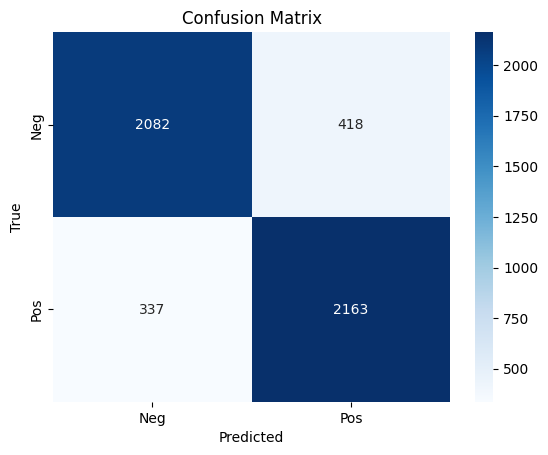


 Training model: SVM
Accuracy: 0.8582

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2500
           1       0.86      0.86      0.86      2500

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



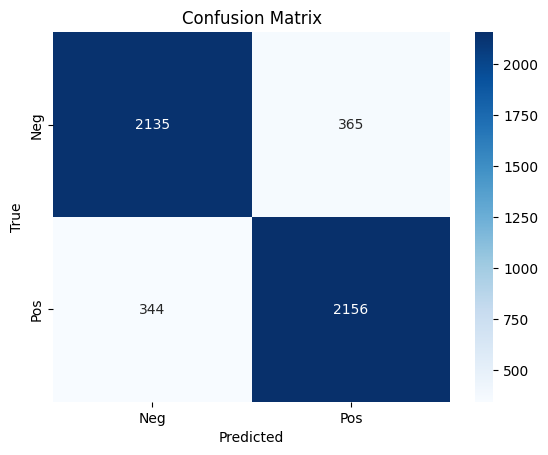

In [7]:
import pandas as pd 
import os
import sys

sys.path.append(os.path.abspath('..'))

from app.model import vectorize_text, train_model, evaluate_model

import joblib

df = pd.read_csv('../data/preprocessed/imdb_reviews_train_clean.csv')


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label'], test_size=0.2, stratify=df['label'], random_state=42
)

X_train_vect, X_test_vect, vectorizer = vectorize_text(X_train, X_test)

for model in ['logistic', 'naive_bayes', 'svm']:
    print(f"\n Training model: {model.upper()}")
    model = train_model(X_train_vect, y_train, model_type=model)
    evaluate_model(model, X_test_vect, y_test)

In [8]:
best_model = train_model(X_train_vect, y_train, model_type='logistic')
joblib.dump(best_model, '../models/best_model.joblib')
joblib.dump(vectorizer, '../models/vectorizer.joblib')

['../models/vectorizer.joblib']